### **1. Data Preparation**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

#Read Data
transaksi = pd.read_excel('/content/drive/MyDrive/skripsi/data_penjualan_maret.xlsx', header = 0, usecols = 'B,C,D,E,I')

#Preview Data
transaksi

Mounted at /content/drive


,TANGGAL,STRUK,KODE BARANG,NAMA BARANG,SUBTOTAL
0,2023-03-01,723,8999999053031,PONDS PINKIS WHT 100,28000
1,2023-03-01,805,8991002105645,KAPAL API MANTAP,11800
2,2023-03-01,805,663300,KRUPUK UDANG PAHALA,18500
3,2023-03-01,1053,8999999589189,SUNLIGHT JERUK NIPIS 650 ML,16000
4,2023-03-01,1053,8999999045920,LIFEBUOY MERAH ISI 4,24000
...,...,...,...,...,...
32312,2023-03-31,1522,8998866201520,TOP KOPI TORAJA,10600
32313,2023-03-31,1522,8992946530357,MINYAK HEMAT BTL I L,17000
32314,2023-03-31,1522,8993110071126,SOSIS SONICE SAPI,19000
32315,2023-03-31,1522,8998866670777,WING BIRU GELAS,7000


In [2]:
#Info of Data
transaksi.info()

#Description of Data
transaksi.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32317 entries, 0 to 32316
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   TANGGAL      32317 non-null  datetime64[ns]
 1   STRUK        32317 non-null  int64         
 2   KODE BARANG  32317 non-null  object        
 3   NAMA BARANG  32317 non-null  object        
 4   SUBTOTAL     32317 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.2+ MB


,TANGGAL,STRUK,SUBTOTAL
count,32317,32317.000000,3.231700e+04
mean,2023-03-14 22:48:04.946003712,1445.180988,1.478375e+04
min,2023-03-01 00:00:00,653.000000,0.000000e+00
25%,2023-03-06 00:00:00,1047.000000,4.700000e+03
50%,2023-03-15 00:00:00,1454.000000,8.500000e+03
75%,2023-03-23 00:00:00,1842.000000,1.700000e+04
max,2023-03-31 00:00:00,2057.000000,2.540000e+06
std,NaN,414.232779,2.963997e+04


### **2. Penanganan Missing Value**

In [3]:
#Check Missing Value
transaksi.isnull()
transaksi.isnull().sum()

TANGGAL        0
STRUK          0
KODE BARANG    0
NAMA BARANG    0
SUBTOTAL       0
dtype: int64

In [4]:
#Drop Row with Missing Value
transaksi = transaksi.dropna()
transaksi.shape

(32317, 5)

### **3. Perhitungan RFM**

### Recency

In [5]:
transaksi['KODE BARANG'] = transaksi['KODE BARANG'].astype("string")
rfm_r = transaksi.groupby(by='KODE BARANG',
						as_index=False)['TANGGAL'].max()
rfm_r.columns = ['KODE BARANG', 'LastPurchaseDate']
recent_date = rfm_r['LastPurchaseDate'].max()
rfm_r['Recency'] = rfm_r['LastPurchaseDate'].apply(
	lambda x: (recent_date - x).days)
rfm_r.sort_values(by='KODE BARANG', ascending=True)

,KODE BARANG,LastPurchaseDate,Recency
0,0,2023-03-23,8
1,1,2023-03-16,15
2,100004,2023-03-30,1
3,100008,2023-03-31,0
4,10003,2023-03-10,21
...,...,...,...
6418,995,2023-03-18,13
6419,99991,2023-03-23,8
6420,99997,2023-03-27,4
6421,CABRP.23.900,2023-03-29,2


### Frequency

In [6]:
#Calculate The Frequency
transaksi['STRUK'] = transaksi['STRUK'].astype("string")
rfm_f = transaksi.groupby(
    by=['KODE BARANG'], as_index=False)['STRUK'].count()
rfm_f.columns = ['KODE BARANG', 'Frequency']
rfm_f['Frequency'] = rfm_f['Frequency'].astype("int")
rfm_f.sort_values(by='KODE BARANG', ascending=True)

,KODE BARANG,Frequency
0,0,1
1,1,3
2,100004,6
3,100008,27
4,10003,1
...,...,...
6418,995,1
6419,99991,2
6420,99997,3
6421,CABRP.23.900,1


### Monetary

In [7]:
# Calculate The Monetary
transaksi['Monetary'] = transaksi['SUBTOTAL']
rfm_m = transaksi.groupby('KODE BARANG')['Monetary'].sum()
rfm_m = rfm_m.reset_index()
rfm_m['Monetary'] = rfm_m['Monetary'].astype("int")
rfm_m.sort_values(by='KODE BARANG', ascending=True)

,KODE BARANG,Monetary
0,0,10500
1,1,34500
2,100004,135000
3,100008,495000
4,10003,128500
...,...,...
6418,995,13500
6419,99991,20000
6420,99997,10500
6421,CABRP.23.900,16500


### Merging RFM

In [8]:
rfm_rf = pd.merge(rfm_r,rfm_f, on='KODE BARANG', how='inner').drop(
     columns='LastPurchaseDate')
# rfm_rf = pd.merge(rfm_r, rfm_f, on='KODE BARANG', how='inner')
rfm_rf.columns = ['KODE BARANG','Recency', 'Frequency']
rfm_rfm = rfm_rf.merge(rfm_m, on='KODE BARANG', how='inner')
rfm_rfm.columns = ['KODE BARANG','Recency', 'Frequency', 'Monetary']
rfm_rfm

,KODE BARANG,Recency,Frequency,Monetary
0,0,8,1,10500
1,1,15,3,34500
2,100004,1,6,135000
3,100008,0,27,495000
4,10003,21,1,128500
...,...,...,...,...
6418,995,13,1,13500
6419,99991,8,2,20000
6420,99997,4,3,10500
6421,CABRP.23.900,2,1,16500


In [9]:
import seaborn as sns
import numpy as np
from scipy import stats

rfm = rfm_rfm[['Recency','Frequency', 'Monetary']]

### **4. K-Means Clustering**

### Elbow Method : Find K

In [10]:
# Elbow-curve/SSD
from sklearn.cluster import KMeans

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm)

    ssd.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

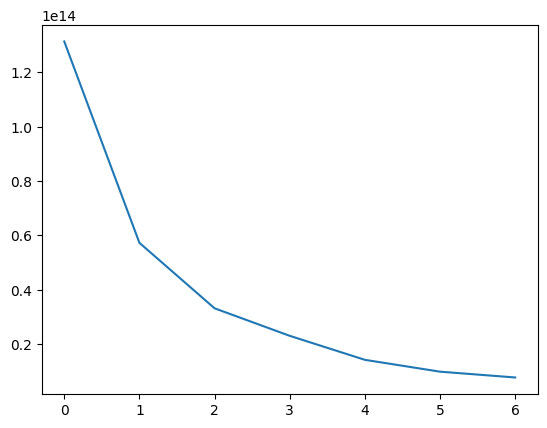

In [11]:
import matplotlib.pyplot as plt
plt.plot(ssd)

### Silhouette Coefficient

In [12]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(rfm, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, the silhouette score is 0.946460377451581


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=3, the silhouette score is 0.9117342433712616


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=4, the silhouette score is 0.7992672100910684


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, the silhouette score is 0.7992852283624027


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, the silhouette score is 0.7421380321479125


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=7, the silhouette score is 0.6717527547848239


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, the silhouette score is 0.6355844669148362


### Clustering

In [13]:
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(rfm)

kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [14]:
# assign the label
rfm['Cluster'] = kmeans.labels_
rfm.columns = ['Recency', 'Frequency', 'Monetary', 'Cluster']
final = pd.concat([rfm_rfm, rfm['Cluster']], axis=1)  # Menggabungkan secara vertikal dengan concat
result = pd.merge(final, transaksi[['KODE BARANG', 'NAMA BARANG']], on='KODE BARANG', how='left')
df = pd.DataFrame(result)
result

,KODE BARANG,Recency,Frequency,Monetary,Cluster,NAMA BARANG
0,0,8,1,10500,0,KAOS KK MEIYSMP REMAJA
1,1,15,3,34500,0,KAOS KK TIFA MUSLIM S.M.L
2,1,15,3,34500,0,KAOS KK TIFA MUSLIM S.M.L
3,1,15,3,34500,0,KAOS KK TIFA MUSLIM S.M.L
4,100004,1,6,135000,0,LIPSTIK SKIVA
...,...,...,...,...,...,...
32312,99997,4,3,10500,0,KONEKTOR MASKER STRAP
32313,99997,4,3,10500,0,KONEKTOR MASKER STRAP
32314,99997,4,3,10500,0,KONEKTOR MASKER STRAP
32315,CABRP.23.900,2,1,16500,0,KAOS KAKI BARBELS KANTOR


In [15]:
import pandas as pd
from google.colab import files
result.to_excel('result.xlsx', index=False)

# Jika menggunakan Google Colabs maka lakukan ini
files.download('result.xlsx')

KeyboardInterrupt: 

       Recency  Frequency  Monetary  Cluster
0            8          1     10500        0
1           15          3     34500        0
2           15          3     34500        0
3           15          3     34500        0
4            1          6    135000        0
...        ...        ...       ...      ...
32312        4          3     10500        0
32313        4          3     10500        0
32314        4          3     10500        0
32315        2          1     16500        0
32316       15          1     10500        0

[32317 rows x 4 columns]


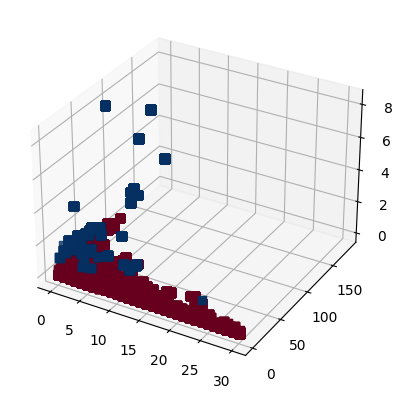

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

df = pd.DataFrame(result, columns=['Recency', 'Frequency','Monetary',"Cluster"])
print (df)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df['Recency'])
y = np.array(df['Frequency'])
z = np.array(df['Monetary'])

ax.scatter(x,y,z, marker="s", c=df["Cluster"], s=40, cmap="RdBu")

plt.show()